# Project work, part 2 - Data Sources

## Project Links

**Github Repository:** https://github.com/fayomitz/IND320-fayomitz  
**Streamlit app:** https://ind320-fayomitz.streamlit.app/

## AI Usage

## Work Log

In [1]:

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
from dotenv import load_dotenv
import os

load_dotenv()
uri = os.getenv("URI")

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [2]:
os.environ["HADOOP_HOME"] = "C:/Hadoop/hadoop-3.3.1"
os.environ["PYSPARK_HADOOP_VERSION"] = "without"

In [3]:
# Connecting to Cassandra
import asyncore
from cassandra.cluster import Cluster
cluster = Cluster(['localhost'], port=9042)
session = cluster.connect()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5628\2193267402.py:2: DeprecationWarning: The asyncore module is deprecated and will be removed in Python 3.12. The recommended replacement is asyncio
  import asyncore


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkCassandraApp').\
    config('spark.jars.packages', 'com.datastax.spark:spark-cassandra-connector_2.12:3.5.1').\
    config('spark.cassandra.connection.host', 'localhost').\
    config('spark.sql.extensions', 'com.datastax.spark.connector.CassandraSparkExtensions').\
    config('spark.sql.catalog.mycatalog', 'com.datastax.spark.connector.datasource.CassandraCatalog').\
    config('spark.cassandra.connection.port', '9042').getOrCreate()
# Some warnings are to be expected.
# If running this cell does not give any output after ~30 seconds, there is likely an error in the configuration (JAVA_HOME, HADOOP_HOME, etc.).

In [5]:
session.execute("CREATE KEYSPACE IF NOT EXISTS my_first_keyspace WITH REPLICATION = { 'class' : 'SimpleStrategy', 'replication_factor' : 1 };")

In [6]:
# Create a new table (first time only)
session.set_keyspace('my_first_keyspace')
session.execute("DROP TABLE IF EXISTS my_first_keyspace.my_first_table;") # Starting from scratch every time
session.execute("CREATE TABLE IF NOT EXISTS my_first_table (ind int PRIMARY KEY, company text, model text);")

In [7]:
# Insert some data (ind is the primary key, must be unique)
session.execute("INSERT INTO my_first_table (ind, company, model) VALUES (1, 'Tesla', 'Model S');")
session.execute("INSERT INTO my_first_table (ind, company, model) VALUES (2, 'Tesla', 'Model 3');")
session.execute("INSERT INTO my_first_table (ind, company, model) VALUES (3, 'Polestar', '3');")

In [8]:
# Query the data
rows = session.execute("SELECT * FROM my_first_table;")
for i in rows:
    print(i)

Row(ind=1, company='Tesla', model='Model S')
Row(ind=2, company='Tesla', model='Model 3')
Row(ind=3, company='Polestar', model='3')


In [9]:
session.execute_async("INSERT INTO my_first_table (ind, company, model) VALUES (5, 'Volkswagen', 'ID.3');")

<ResponseFuture: query='<SimpleStatement query="INSERT INTO my_first_table (ind, company, model) VALUES (5, 'Volkswagen', 'ID.3');", consistency=Not Set>' request_id=25 result=(no result yet) exception=None coordinator_host=None>

In [10]:
# Query the data
rows = session.execute("SELECT * FROM my_first_table;")
for i in rows:
    print(i)

Row(ind=5, company='Volkswagen', model='ID.3')
Row(ind=1, company='Tesla', model='Model S')
Row(ind=2, company='Tesla', model='Model 3')
Row(ind=3, company='Polestar', model='3')


In [11]:
# More specific query
prepared_statement = session.prepare("SELECT * FROM my_first_table WHERE company=? ALLOW FILTERING;")
teslas = session.execute(prepared_statement, ['Tesla'])
for i in teslas:
    print(i)

Row(ind=1, company='Tesla', model='Model S')
Row(ind=2, company='Tesla', model='Model 3')


In [12]:
# Selecting a database and a collection.
database = client['example']
collection = database['data']

In [13]:
# Inserting a single document (dictionary).
collection.insert_one({'name': 'Hallvard', 'age': 23})

# Inserting multiple documents (list of dictionaries).
collection.insert_many([
    {'name': 'Kristian', 'age': 27},
    {'name': 'Ihn Duck', 'age': 15}
])

# Note that an _id field is automatically generated by MongoDB.

In [14]:
# Reading ALL documents from a collection.
# ........................................

documents = collection.find({})
# A cursor is returned.

# The cursor can be iterated over:
for document in documents:
    print(document)

# Or directly converted to a list:
#documents = list(documents)

{'_id': ObjectId('68f24cb2a6f0e9d0a1f97b7f'), 'name': 'Hallvard Lavik', 'age': 33}
{'_id': ObjectId('68f24cb2a6f0e9d0a1f97b80'), 'name': 'Kristian', 'age': 37}
{'_id': ObjectId('68f24cb2a6f0e9d0a1f97b81'), 'name': 'Ihn Duck', 'age': 25}
{'_id': ObjectId('68f25da8d8698bfd0c7e6a7b'), 'name': 'Hallvard Lavik', 'age': 32}
{'_id': ObjectId('68f25da8d8698bfd0c7e6a7c'), 'name': 'Kristian', 'age': 36}
{'_id': ObjectId('68f25da8d8698bfd0c7e6a7d'), 'name': 'Ihn Duck', 'age': 24}
{'_id': ObjectId('68f9e1224e8c45d5ee0fb385'), 'name': 'Hallvard Lavik', 'age': 31}
{'_id': ObjectId('68f9e1224e8c45d5ee0fb386'), 'name': 'Kristian', 'age': 35}
{'_id': ObjectId('68f9e1224e8c45d5ee0fb387'), 'name': 'Ihn Duck', 'age': 23}
{'_id': ObjectId('68f9e24dd4c233458872dfec'), 'name': 'Hallvard Lavik', 'age': 30}
{'_id': ObjectId('68f9e24ed4c233458872dfed'), 'name': 'Kristian', 'age': 34}
{'_id': ObjectId('68f9e24ed4c233458872dfee'), 'name': 'Ihn Duck', 'age': 22}
{'_id': ObjectId('68f9e32c6dfbcb4154919b7f'), 'name'

In [15]:
# Reading SPECIFIC documents from a collection.
# .............................................

hallvard = collection.find({'name': 'Hallvard'})

for document in hallvard:
    print(document)

hallvard = list(hallvard)

{'_id': ObjectId('68f9fe1aeec11bd59064fc54'), 'name': 'Hallvard', 'age': 23}


In [16]:
# Updating a single document.
# ...........................
collection.update_one(
    {'name': 'Hallvard'},
    {'$set': {'name': 'Hallvard Lavik'}}  # Sets the `name` to `Hallvard Lavik`.
)

# Updating multiple documents.
# ............................
collection.update_many(
    {},
       {'$inc': {'age': 1}}  # Increments the `age` of all documents by `1`.
)

In [24]:
import requests
from datetime import datetime, timedelta
import pytz

headers = {
    
}

base_url = "https://api.elhub.no/energy-data/v0/price-areas"
dataset = "PRODUCTION_PER_GROUP_MBA_HOUR"

# Use timezone-aware datetime for Norwegian time zone
oslo_tz = pytz.timezone('Europe/Oslo')
start = oslo_tz.localize(datetime(2021, 1, 1, 0, 0, 0))
end = oslo_tz.localize(datetime(2021, 12, 31, 23, 59, 59))

responses = []

while start <= end:
    # Calculate month end in the same timezone
    month_end = (start.replace(day=28) + timedelta(days=4)).replace(day=1) - timedelta(seconds=1)
    if month_end > end:
        month_end = end

    params = {
        "dataset": dataset,
        "startDate": start.isoformat(),
        "endDate": month_end.isoformat()
    }

    response = requests.get(base_url, headers=headers, params=params)
    responses.append(response.json())

    start = month_end + timedelta(seconds=1)


In [26]:
# Extract all productionPerGroupMbaHour lists from all responses
all_production_data = []

for response in responses:
    # Navigate through the response structure
    if 'data' in response:
        for price_area in response['data']:
            if 'attributes' in price_area and 'productionPerGroupMbaHour' in price_area['attributes']:
                production_list = price_area['attributes']['productionPerGroupMbaHour']
                # Only add non-empty lists
                if production_list:
                    all_production_data.extend(production_list)

print(f"Total records extracted: {len(all_production_data)}")
print(f"Sample record: {all_production_data[0] if all_production_data else 'No data'}")

Total records extracted: 215353
Sample record: {'endTime': '2021-01-01T01:00:00+01:00', 'lastUpdatedTime': '2024-12-20T10:35:40+01:00', 'priceArea': 'NO1', 'productionGroup': 'hydro', 'quantityKwh': 2507716.8, 'startTime': '2021-01-01T00:00:00+01:00'}


In [27]:
# Convert to pandas DataFrame
import pandas as pd

df = pd.DataFrame(all_production_data)
print(f"DataFrame shape: {df.shape}")
print(f"\nDataFrame columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

DataFrame shape: (215353, 6)

DataFrame columns: ['endTime', 'lastUpdatedTime', 'priceArea', 'productionGroup', 'quantityKwh', 'startTime']

First few rows:
                     endTime            lastUpdatedTime priceArea  \
0  2021-01-01T01:00:00+01:00  2024-12-20T10:35:40+01:00       NO1   
1  2021-01-01T02:00:00+01:00  2024-12-20T10:35:40+01:00       NO1   
2  2021-01-01T03:00:00+01:00  2024-12-20T10:35:40+01:00       NO1   
3  2021-01-01T04:00:00+01:00  2024-12-20T10:35:40+01:00       NO1   
4  2021-01-01T05:00:00+01:00  2024-12-20T10:35:40+01:00       NO1   

  productionGroup  quantityKwh                  startTime  
0           hydro    2507716.8  2021-01-01T00:00:00+01:00  
1           hydro    2494728.0  2021-01-01T01:00:00+01:00  
2           hydro    2486777.5  2021-01-01T02:00:00+01:00  
3           hydro    2461176.0  2021-01-01T03:00:00+01:00  
4           hydro    2466969.2  2021-01-01T04:00:00+01:00  


In [28]:
# Create Cassandra table for production data
session.execute("DROP TABLE IF EXISTS my_first_keyspace.production_data;")

# Create table with appropriate schema based on the data structure
create_table_query = """
CREATE TABLE IF NOT EXISTS my_first_keyspace.production_data (
    price_area text,
    production_group text,
    start_time timestamp,
    end_time timestamp,
    quantity_kwh double,
    last_updated_time timestamp,
    PRIMARY KEY ((price_area, production_group), start_time)
) WITH CLUSTERING ORDER BY (start_time ASC);
"""

session.execute(create_table_query)
print("Table 'production_data' created successfully!")

Table 'production_data' created successfully!


In [29]:
# Convert pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df)

# Rename columns to match Cassandra table schema (convert camelCase to snake_case)
spark_df = spark_df.withColumnRenamed("priceArea", "price_area") \
                   .withColumnRenamed("productionGroup", "production_group") \
                   .withColumnRenamed("startTime", "start_time") \
                   .withColumnRenamed("endTime", "end_time") \
                   .withColumnRenamed("quantityKwh", "quantity_kwh") \
                   .withColumnRenamed("lastUpdatedTime", "last_updated_time")

# Convert timestamp strings to timestamp type
from pyspark.sql.functions import to_timestamp

spark_df = spark_df.withColumn("start_time", to_timestamp("start_time")) \
                   .withColumn("end_time", to_timestamp("end_time")) \
                   .withColumn("last_updated_time", to_timestamp("last_updated_time"))

print("Spark DataFrame schema:")
spark_df.printSchema()
print(f"\nTotal rows: {spark_df.count()}")
print("\nFirst few rows:")
spark_df.show(5, truncate=False)

Spark DataFrame schema:
root
 |-- end_time: timestamp (nullable = true)
 |-- last_updated_time: timestamp (nullable = true)
 |-- price_area: string (nullable = true)
 |-- production_group: string (nullable = true)
 |-- quantity_kwh: double (nullable = true)
 |-- start_time: timestamp (nullable = true)


Total rows: 215353

First few rows:
+-------------------+-------------------+----------+----------------+------------+-------------------+
|end_time           |last_updated_time  |price_area|production_group|quantity_kwh|start_time         |
+-------------------+-------------------+----------+----------------+------------+-------------------+
|2021-01-01 01:00:00|2024-12-20 10:35:40|NO1       |hydro           |2507716.8   |2021-01-01 00:00:00|
|2021-01-01 02:00:00|2024-12-20 10:35:40|NO1       |hydro           |2494728.0   |2021-01-01 01:00:00|
|2021-01-01 03:00:00|2024-12-20 10:35:40|NO1       |hydro           |2486777.5   |2021-01-01 02:00:00|
|2021-01-01 04:00:00|2024-12-20 10:35:40|

In [30]:
# Insert data into Cassandra using Spark
spark_df.write \
    .format("org.apache.spark.sql.cassandra") \
    .mode("append") \
    .options(table="production_data", keyspace="my_first_keyspace") \
    .save()

print("Data successfully inserted into Cassandra!")

Data successfully inserted into Cassandra!


In [31]:
# Verify the data was inserted by querying from Cassandra
rows = session.execute("SELECT * FROM my_first_keyspace.production_data LIMIT 10;")
print("Sample data from Cassandra:")
for row in rows:
    print(row)

Sample data from Cassandra:
Row(price_area='NO3', production_group='wind', start_time=datetime.datetime(2020, 12, 31, 23, 0), end_time=datetime.datetime(2021, 1, 1, 0, 0), last_updated_time=datetime.datetime(2024, 12, 20, 9, 35, 40), quantity_kwh=259312.2)
Row(price_area='NO3', production_group='wind', start_time=datetime.datetime(2021, 1, 1, 0, 0), end_time=datetime.datetime(2021, 1, 1, 1, 0), last_updated_time=datetime.datetime(2024, 12, 20, 9, 35, 40), quantity_kwh=225762.9)
Row(price_area='NO3', production_group='wind', start_time=datetime.datetime(2021, 1, 1, 1, 0), end_time=datetime.datetime(2021, 1, 1, 2, 0), last_updated_time=datetime.datetime(2024, 12, 20, 9, 35, 40), quantity_kwh=248005.1)
Row(price_area='NO3', production_group='wind', start_time=datetime.datetime(2021, 1, 1, 2, 0), end_time=datetime.datetime(2021, 1, 1, 3, 0), last_updated_time=datetime.datetime(2024, 12, 20, 9, 35, 40), quantity_kwh=243180.3)
Row(price_area='NO3', production_group='wind', start_time=datetim

## Visualizations

Creating plots for production data analysis:
1. Pie chart for total yearly production by production group
2. Line plot for first month showing production trends by group

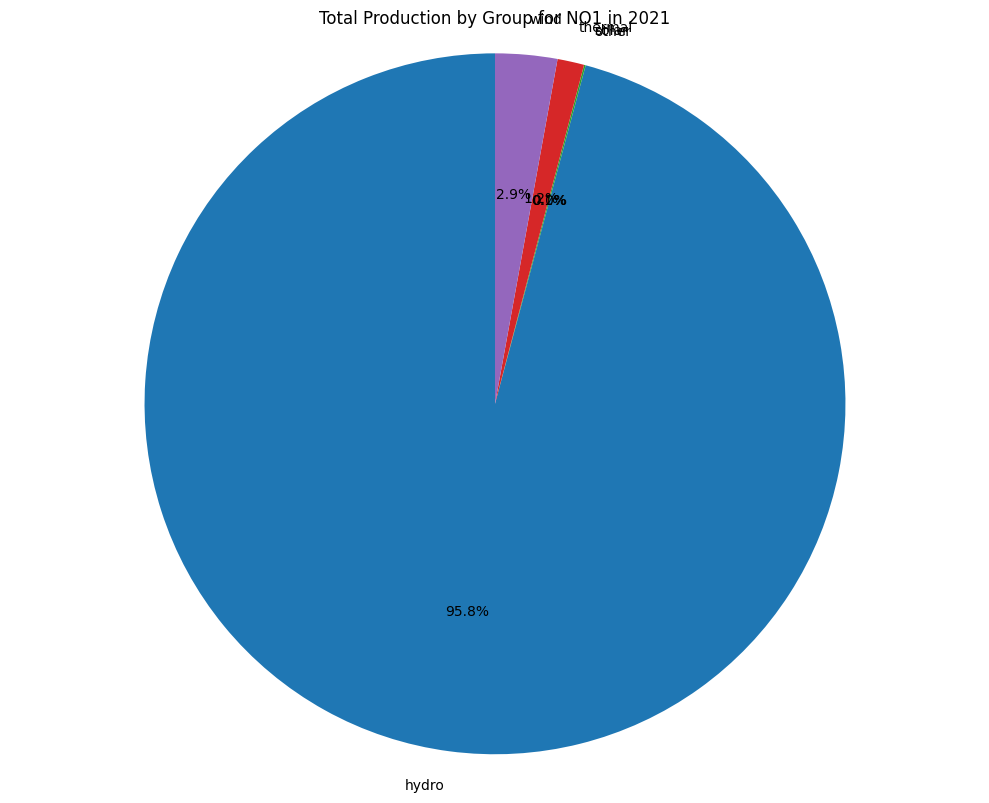


Total production by group for NO1:
productionGroup
hydro      1.835678e+10
other      5.256123e+04
solar      1.438194e+07
thermal    2.361180e+08
wind       5.473603e+08
Name: quantityKwh, dtype: float64


In [32]:
# Pie chart: Total production for the year by production group for a chosen price area
import matplotlib.pyplot as plt

# Choose a price area (you can change this)
chosen_price_area = 'NO1'

# Filter data for the chosen price area
price_area_data = df[df['priceArea'] == chosen_price_area]

# Group by production group and sum the quantity
yearly_production = price_area_data.groupby('productionGroup')['quantityKwh'].sum()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(yearly_production, labels=yearly_production.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Total Production by Group for {chosen_price_area} in 2021')
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nTotal production by group for {chosen_price_area}:")
print(yearly_production)

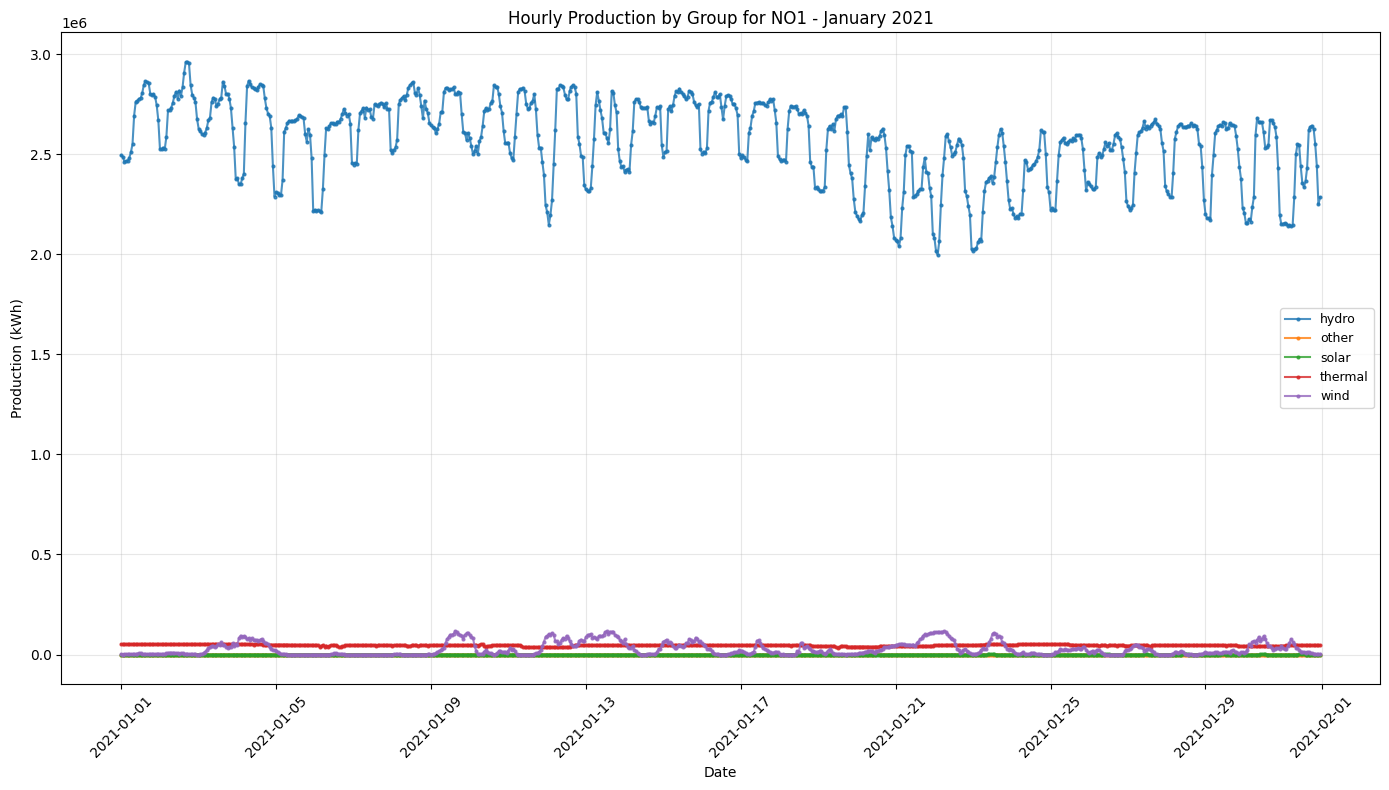


Number of records for NO1 in January 2021: 3720
Production groups: ['hydro' 'other' 'solar' 'thermal' 'wind']


In [34]:
# Line plot: First month production by production group for a chosen price area
import matplotlib.pyplot as plt
from datetime import datetime

# Filter data for the chosen price area and first month
# Use utc=True to handle mixed timezones and convert to datetime
df['startTime_parsed'] = pd.to_datetime(df['startTime'], utc=True)
first_month_data = df[(df['priceArea'] == chosen_price_area) & 
                      (df['startTime_parsed'].dt.month == 1) & 
                      (df['startTime_parsed'].dt.year == 2021)]

# Create line plot
plt.figure(figsize=(14, 8))

# Plot each production group separately
for group in first_month_data['productionGroup'].unique():
    group_data = first_month_data[first_month_data['productionGroup'] == group]
    group_data_sorted = group_data.sort_values('startTime_parsed')
    plt.plot(group_data_sorted['startTime_parsed'], 
             group_data_sorted['quantityKwh'], 
             label=group, 
             marker='o', 
             markersize=2,
             linewidth=1.5,
             alpha=0.8)

plt.xlabel('Date')
plt.ylabel('Production (kWh)')
plt.title(f'Hourly Production by Group for {chosen_price_area} - January 2021')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nNumber of records for {chosen_price_area} in January 2021: {len(first_month_data)}")
print(f"Production groups: {first_month_data['productionGroup'].unique()}")

## Insert Data into MongoDB

Converting the Spark DataFrame data to MongoDB documents.

In [35]:
# Insert Spark-extracted data into MongoDB
# Create a new database and collection for production data
production_db = client['energy_data']
production_collection = production_db['production']

# Convert the pandas DataFrame to dictionary records
production_records = df.to_dict('records')

# Insert the data into MongoDB
# Clear existing data first (optional)
production_collection.delete_many({})

# Insert all records
result = production_collection.insert_many(production_records)

print(f"Successfully inserted {len(result.inserted_ids)} documents into MongoDB!")
print(f"Database: energy_data")
print(f"Collection: production")

Successfully inserted 215353 documents into MongoDB!
Database: energy_data
Collection: production


In [36]:
# Verify the data was inserted by querying from MongoDB
sample_docs = production_collection.find().limit(5)

print("Sample documents from MongoDB:")
for doc in sample_docs:
    print(doc)

# Get count of documents
total_count = production_collection.count_documents({})
print(f"\nTotal documents in MongoDB: {total_count}")

# Get unique price areas
unique_areas = production_collection.distinct('priceArea')
print(f"Unique price areas: {unique_areas}")

Sample documents from MongoDB:
{'_id': ObjectId('68fb309beec11bd59064fc57'), 'endTime': '2021-01-01T01:00:00+01:00', 'lastUpdatedTime': '2024-12-20T10:35:40+01:00', 'priceArea': 'NO1', 'productionGroup': 'hydro', 'quantityKwh': 2507716.8, 'startTime': '2021-01-01T00:00:00+01:00', 'startTime_parsed': datetime.datetime(2020, 12, 31, 23, 0)}
{'_id': ObjectId('68fb309beec11bd59064fc58'), 'endTime': '2021-01-01T02:00:00+01:00', 'lastUpdatedTime': '2024-12-20T10:35:40+01:00', 'priceArea': 'NO1', 'productionGroup': 'hydro', 'quantityKwh': 2494728.0, 'startTime': '2021-01-01T01:00:00+01:00', 'startTime_parsed': datetime.datetime(2021, 1, 1, 0, 0)}
{'_id': ObjectId('68fb309beec11bd59064fc59'), 'endTime': '2021-01-01T03:00:00+01:00', 'lastUpdatedTime': '2024-12-20T10:35:40+01:00', 'priceArea': 'NO1', 'productionGroup': 'hydro', 'quantityKwh': 2486777.5, 'startTime': '2021-01-01T02:00:00+01:00', 'startTime_parsed': datetime.datetime(2021, 1, 1, 1, 0)}
{'_id': ObjectId('68fb309beec11bd59064fc5a'),